Multi-layer Perceptron Regressor (MLPRegressor) - MLP também pode ser usado para resolver problemas de regressão. Para este exemplo foi utilizado o conjunto de dados House Sales em King County, EUA, da plataforma “Kaggle” (https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

In [ ]:
from sklearn.model_selection import train_test_split # Biblioteca para separação de amostras para treino e teste, curva de aprendizagem do treinamento e para processar a validação cruzada
from sklearn.neural_network import MLPRegressor # Biblioteca para utilização do Regressor MLP
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Biblioteca utilizada para normalização dos dados
from sklearn.pipeline import Pipeline # Biblioteca para organização de ações em sequência
from sklearn import metrics # Biblioteca para avaliação das métricas no modelo
import matplotlib.pyplot as plt # Para visualizacao dos dados por meio de gráfico
import numpy as np # Biblioteca de manipulação de arrays Numpy
import pandas as pd # Biblioteca para manipulação de dados, aqui especificamente para importação e manipulação inicial do dataset
import seaborn as sns # Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib.

Carregamento e Organização Inicial do Dataset  (Artigo sobre mais informações do seaborn (sns): https://medium.com/@bernardolago/gr%C3%A1ficos-usando-seaborn-61f7d23481cf)

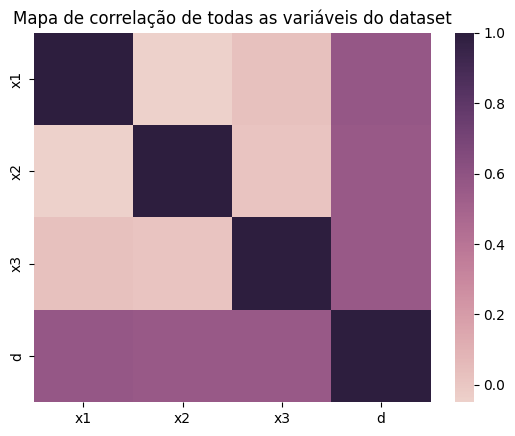

In [ ]:
#Carregamento do dataframe
df_treino = pd.read_csv("ressonanciaMLP.csv") # Carregamento do dataset para treino
df_test = pd.read_csv("ressonanciaMLPTest.csv") # Carregamento do dataset para teste

# Gera um gráfico matricial para apresentar a correção entre as variáveis de entrada do dataset
ax = sns.heatmap(df_treino.corr(numeric_only=True), annot=False, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set_title('Mapa de correlação de todas as variáveis do dataset')
ax=ax

In [ ]:
#Tratamento dos dados (não necessário nessa atividade)
df_treino.head()

,x1,x2,x3,d
0,0.8799,0.7998,0.3972,0.8399
1,0.5700,0.5111,0.2418,0.6258
2,0.6796,0.4117,0.3370,0.6622
3,0.3567,0.2967,0.6037,0.5969
4,0.3866,0.8390,0.0232,0.5316


In [ ]:
#dados já padronizados/normalizados
#Criando a base de treino e teste

trainX = df_treino.drop('d', axis=1) # Exclusão da variável price das entradas
trainY = df_treino['d'] # Inclusão da variável price no vetor de saídas desejadas

testX = df_test.drop('d', axis=1) # Exclusão da variável price das entradas
testY = df_test['d'] # Inclusão da variável price no vetor de saídas desejadas

testY.head()

0    0.4831
1    0.5965
2    0.5318
3    0.6843
4    0.2872
Name: d, dtype: float64

Função de ativação 'tanh' 5 neuronios

In [ ]:
mlp_tanh_5 = MLPRegressor(hidden_layer_sizes=(5), activation='tanh', max_iter=1000,
                      learning_rate_init=0.01)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_tanh_5.fit(trainX, trainY)

MLPRegressor(activation='tanh', hidden_layer_sizes=5, learning_rate_init=0.01,
             max_iter=1000)

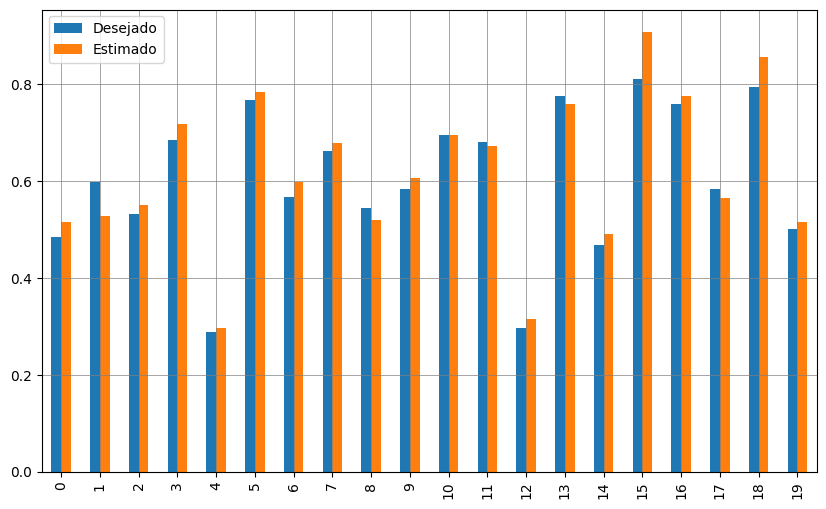

In [ ]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_tanh_5.predict(testX)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(40) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

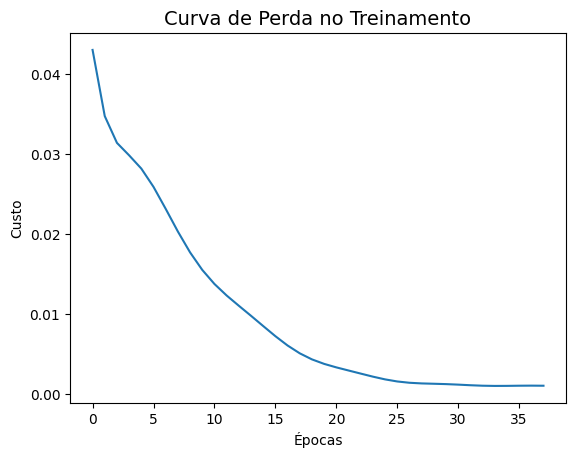

In [ ]:
plt.plot(mlp_tanh_5.loss_curve_) # Plotando o gráfico de erros no processo de treinamento
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

Resumo das Métricas
Links de Referência:
- https://michael-fuchs-python.netlify.app/2019/06/30/metrics-for-regression-analysis/
- https://medium.com/turing-talks/como-avaliar-seu-modelo-de-regress%C3%A3o-c2c8d73dab96

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.
print('R2: ', metrics.r2_score(testY, y_pred)) # Apresenta o R2 Score - Representa quanto o modelo está prevendo corretamente, tem uma variação de 0 a 1. Caso seja obtido pelo modelo o R2 = 1, pode ser afirmado que os dados tem relação linear de 100%.

Mean Absolute Error (MAE): 0.027232928036064252
Mean Squared Error (MSE): 0.0012573506330762333
Root Mean Squared Error (RMSE): 0.03545914033188387
Mean Absolute Percentage Error (MAPE): 0.04507444392659898
R2:  0.9417420591699924


In [ ]:
print(mlp_tanh_5.loss_)
print(mlp_tanh_5.n_iter_)

0.0010664350642492864
38


Função de ativação 'tanh' 10 neuronios

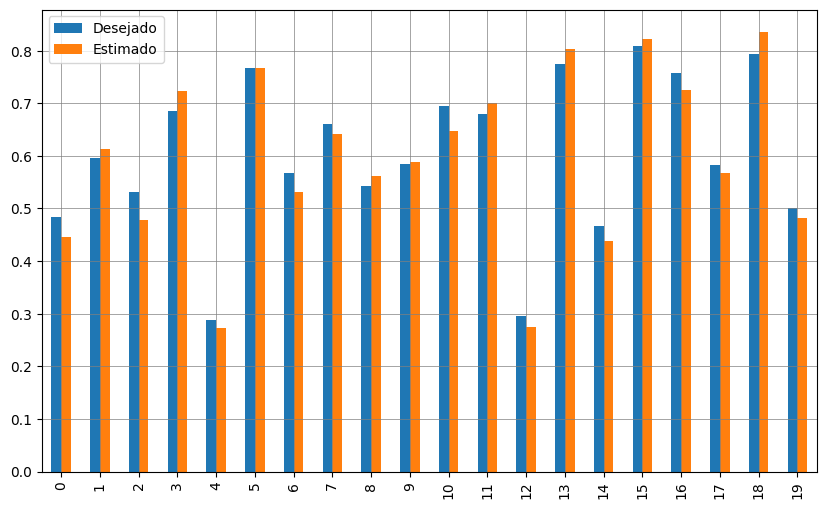

In [ ]:
mlp_tanh_10 = MLPRegressor(hidden_layer_sizes=(10), activation='tanh', max_iter=1000,
                      learning_rate_init=0.01)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_tanh_10.fit(trainX, trainY)

# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_tanh_10.predict(testX)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(40) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

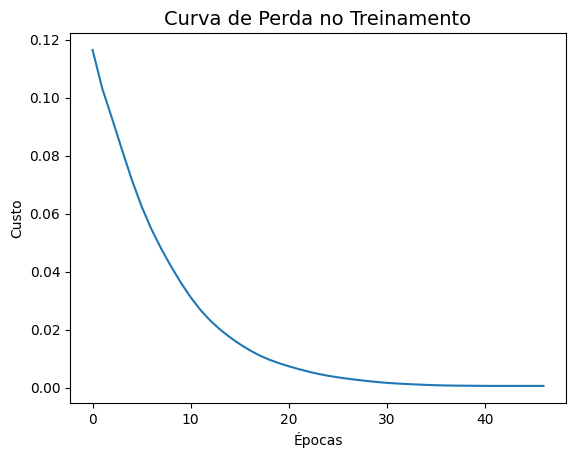

In [ ]:
plt.plot(mlp_tanh_10.loss_curve_) # Plotando o gráfico de erros no processo de treinamento
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.
print('R2: ', metrics.r2_score(testY, y_pred)) # Apresenta o R2 Score - Representa quanto o modelo está prevendo corretamente, tem uma variação de 0 a 1. Caso seja obtido pelo modelo o R2 = 1, pode ser afirmado que os dados tem relação linear de 100%.

Mean Absolute Error (MAE): 0.025534907426298502
Mean Squared Error (MSE): 0.000843272030036388
Root Mean Squared Error (RMSE): 0.029039146510122987
Mean Absolute Percentage Error (MAPE): 0.04486792640477942
R2:  0.9609279299368821


In [ ]:
print(mlp_tanh_10.loss_)
print(mlp_tanh_10.n_iter_)

0.0005827400779378586
47


Função de ativação 'tanh' 15 neuronios

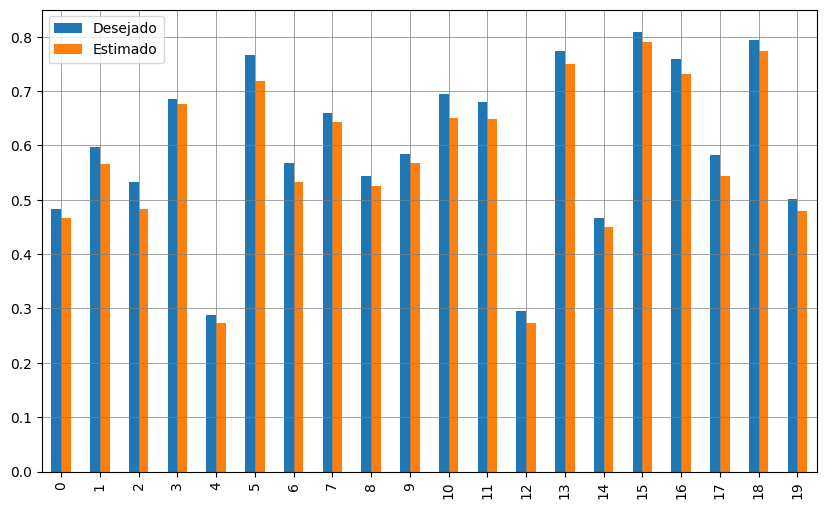

In [ ]:
mlp_tanh_15 = MLPRegressor(hidden_layer_sizes=(15), activation='tanh', max_iter=1000,
                      learning_rate_init=0.01)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_tanh_15.fit(trainX, trainY)

# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_tanh_15.predict(testX)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(40) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

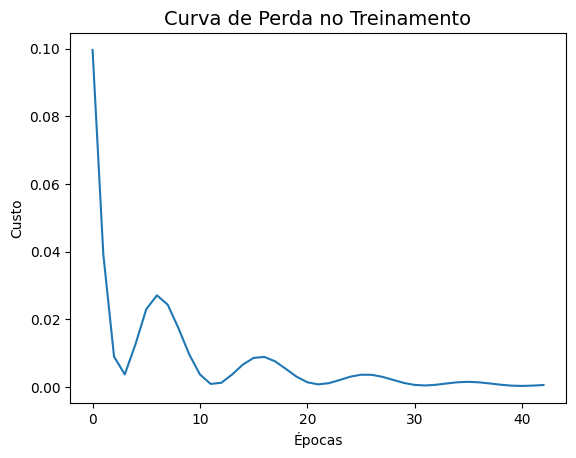

In [ ]:
plt.plot(mlp_tanh_15.loss_curve_) # Plotando o gráfico de erros no processo de treinamento
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.
print('R2: ', metrics.r2_score(testY, y_pred)) # Apresenta o R2 Score - Representa quanto o modelo está prevendo corretamente, tem uma variação de 0 a 1. Caso seja obtido pelo modelo o R2 = 1, pode ser afirmado que os dados tem relação linear de 100%.

Mean Absolute Error (MAE): 0.025917761026567156
Mean Squared Error (MSE): 0.0007982715050590106
Root Mean Squared Error (RMSE): 0.02825369896241925
Mean Absolute Percentage Error (MAPE): 0.04483835545820516
R2:  0.9630129791287987


In [ ]:
print(mlp_tanh_15.loss_)
print(mlp_tanh_15.n_iter_)

0.0006316063307469622
43


Função de ativação 'relu' 5 neuronios

In [ ]:
mlp_relu_5 = MLPRegressor(hidden_layer_sizes=(5), activation='relu', max_iter=1000,
                      learning_rate_init=0.01)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_relu_5.fit(trainX, trainY)

MLPRegressor(hidden_layer_sizes=5, learning_rate_init=0.01, max_iter=1000)

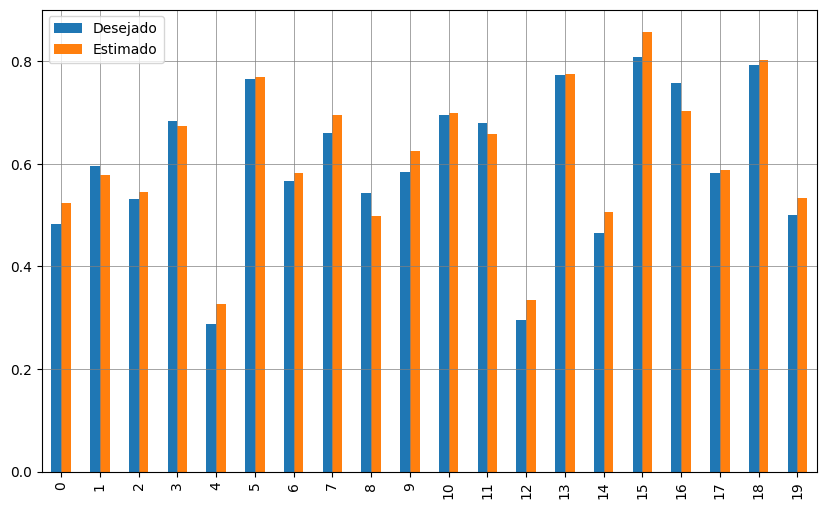

In [ ]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_relu_5.predict(testX)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(40) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

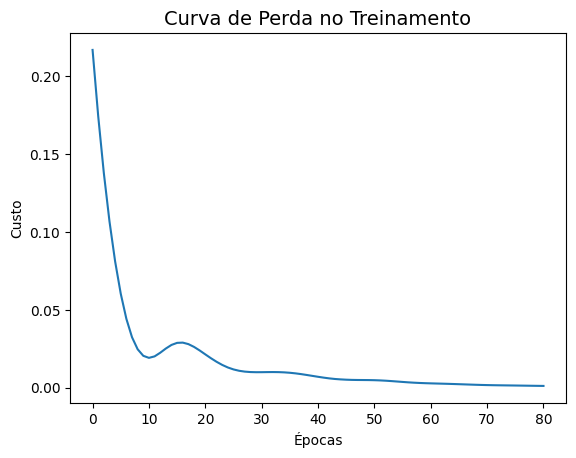

In [ ]:
plt.plot(mlp_relu_5.loss_curve_) # Plotando o gráfico de erros no processo de treinamento
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.
print('R2: ', metrics.r2_score(testY, y_pred)) # Apresenta o R2 Score - Representa quanto o modelo está prevendo corretamente, tem uma variação de 0 a 1. Caso seja obtido pelo modelo o R2 = 1, pode ser afirmado que os dados tem relação linear de 100%.
print(mlp_relu_5.loss_)
print(mlp_relu_5.n_iter_)

Mean Absolute Error (MAE): 0.02575799521342672
Mean Squared Error (MSE): 0.0009548027708921374
Root Mean Squared Error (RMSE): 0.030899883023923203
Mean Absolute Percentage Error (MAPE): 0.05002304869347831
R2:  0.9557602773103397
0.0011855955100761378
81


Função de ativação 'relu' 10 neuronios

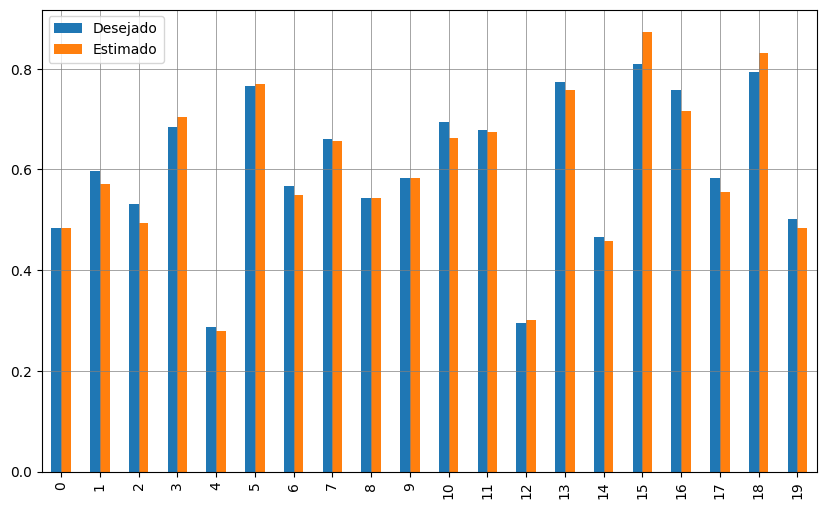

In [ ]:
mlp_relu_10 = MLPRegressor(hidden_layer_sizes=(10), activation='relu', max_iter=1000,
                      learning_rate_init=0.01)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_relu_10.fit(trainX, trainY)
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_relu_10.predict(testX)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(40) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

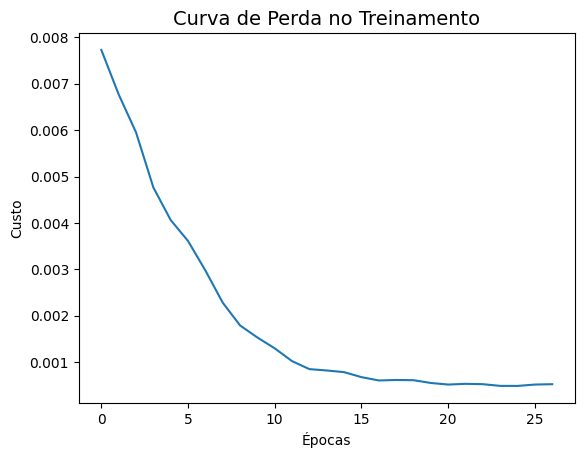

In [ ]:
plt.plot(mlp_relu_10.loss_curve_) # Plotando o gráfico de erros no processo de treinamento
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.
print('R2: ', metrics.r2_score(testY, y_pred)) # Apresenta o R2 Score - Representa quanto o modelo está prevendo corretamente, tem uma variação de 0 a 1. Caso seja obtido pelo modelo o R2 = 1, pode ser afirmado que os dados tem relação linear de 100%.
print(mlp_relu_10.loss_)
print(mlp_relu_10.n_iter_)

Mean Absolute Error (MAE): 0.018501807665000116
Mean Squared Error (MSE): 0.0006333959353128873
Root Mean Squared Error (RMSE): 0.025167358528715073
Mean Absolute Percentage Error (MAPE): 0.029227432523770035
R2:  0.9706523049730805
0.000525352144278868
27


Função de ativação 'relu' 15 neuronios

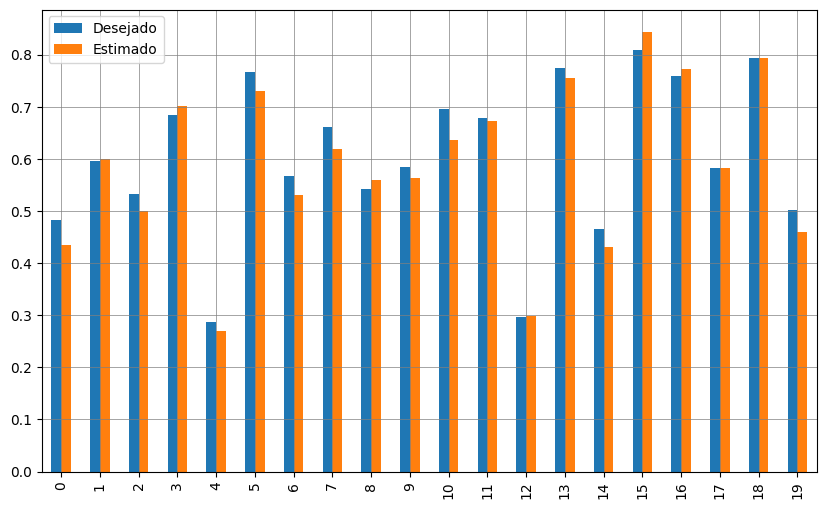

In [ ]:
mlp_relu_15 = MLPRegressor(hidden_layer_sizes=(15), activation='relu', max_iter=1000,
                      learning_rate_init=0.01)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_relu_15.fit(trainX, trainY)
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_relu_15.predict(testX)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(40) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

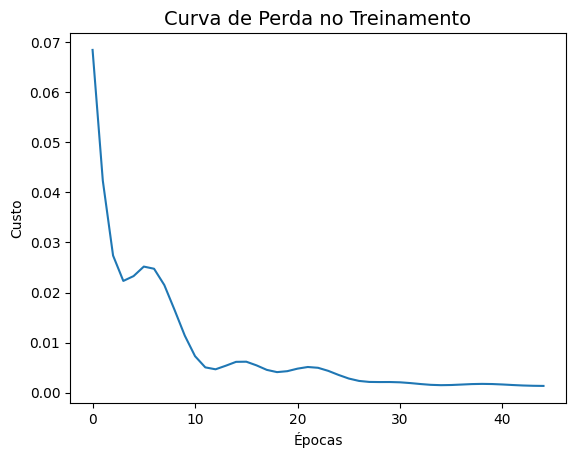

In [ ]:
plt.plot(mlp_relu_15.loss_curve_) # Plotando o gráfico de erros no processo de treinamento
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.
print('R2: ', metrics.r2_score(testY, y_pred)) # Apresenta o R2 Score - Representa quanto o modelo está prevendo corretamente, tem uma variação de 0 a 1. Caso seja obtido pelo modelo o R2 = 1, pode ser afirmado que os dados tem relação linear de 100%.
print(mlp_relu_15.loss_)
print(mlp_relu_15.n_iter_)

Mean Absolute Error (MAE): 0.02422386430088541
Mean Squared Error (MSE): 0.000869132433534139
Root Mean Squared Error (RMSE): 0.029481052110366397
Mean Absolute Percentage Error (MAPE): 0.04220300470857974
R2:  0.9597297169506397
0.0013421959052400672
45


Função de ativação 'logistic' 5 neuronios

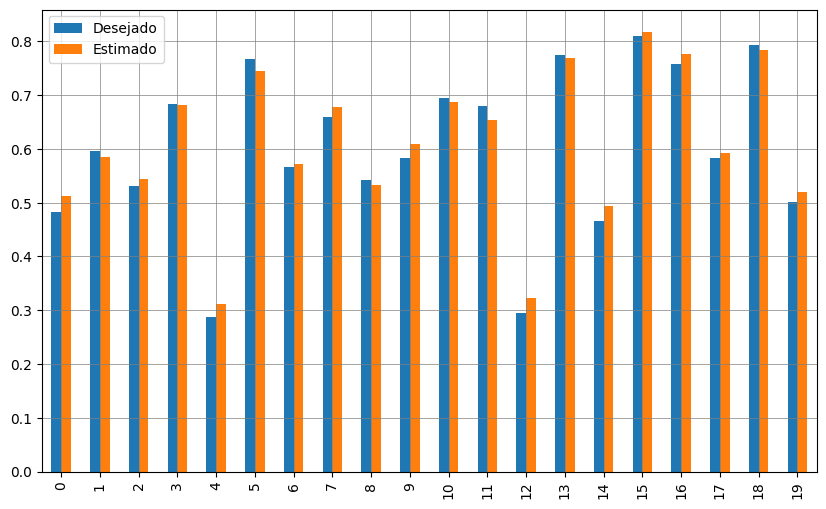

In [ ]:
mlp_logistic_5 = MLPRegressor(hidden_layer_sizes=(5), activation='logistic', max_iter=1000,
                      learning_rate_init=0.01)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_logistic_5.fit(trainX, trainY)
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_logistic_5.predict(testX)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(40) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

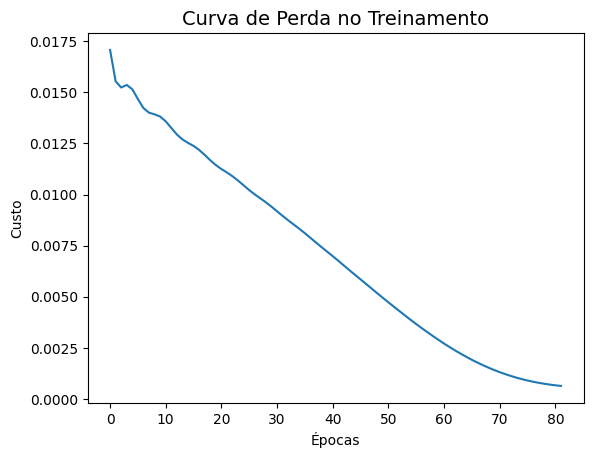

In [ ]:
plt.plot(mlp_logistic_5.loss_curve_) # Plotando o gráfico de erros no processo de treinamento
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.
print('R2: ', metrics.r2_score(testY, y_pred)) # Apresenta o R2 Score - Representa quanto o modelo está prevendo corretamente, tem uma variação de 0 a 1. Caso seja obtido pelo modelo o R2 = 1, pode ser afirmado que os dados tem relação linear de 100%.
print(mlp_logistic_5.loss_)
print(mlp_logistic_5.n_iter_)

Mean Absolute Error (MAE): 0.01598008002485208
Mean Squared Error (MSE): 0.0003229417489326432
Root Mean Squared Error (RMSE): 0.017970580094494534
Mean Absolute Percentage Error (MAPE): 0.031391683430578916
R2:  0.9850368538370026
0.0006419184650829238
82


Função de ativação 'logistic' 10 neuronios

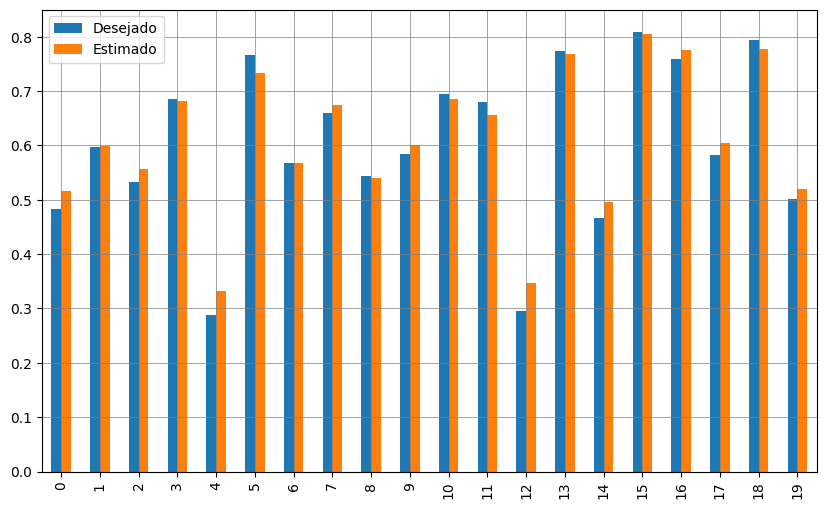

In [ ]:
mlp_logistic_10 = MLPRegressor(hidden_layer_sizes=(10), activation='logistic', max_iter=1000,
                      learning_rate_init=0.01)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_logistic_10.fit(trainX, trainY)
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_logistic_10.predict(testX)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(40) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

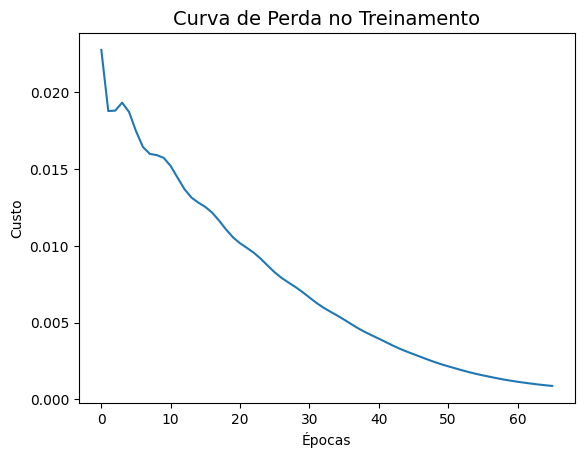

In [ ]:
plt.plot(mlp_logistic_10.loss_curve_) # Plotando o gráfico de erros no processo de treinamento
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.
print('R2: ', metrics.r2_score(testY, y_pred)) # Apresenta o R2 Score - Representa quanto o modelo está prevendo corretamente, tem uma variação de 0 a 1. Caso seja obtido pelo modelo o R2 = 1, pode ser afirmado que os dados tem relação linear de 100%.
print(mlp_logistic_10.loss_)
print(mlp_logistic_10.n_iter_)

Mean Absolute Error (MAE): 0.018696316858795112
Mean Squared Error (MSE): 0.0005510032477429604
Root Mean Squared Error (RMSE): 0.023473458367759967
Mean Absolute Percentage Error (MAPE): 0.039876624962341914
R2:  0.9744698783619214
0.0008751652968317849
66


Função de ativação 'logistic' 15 neuronios

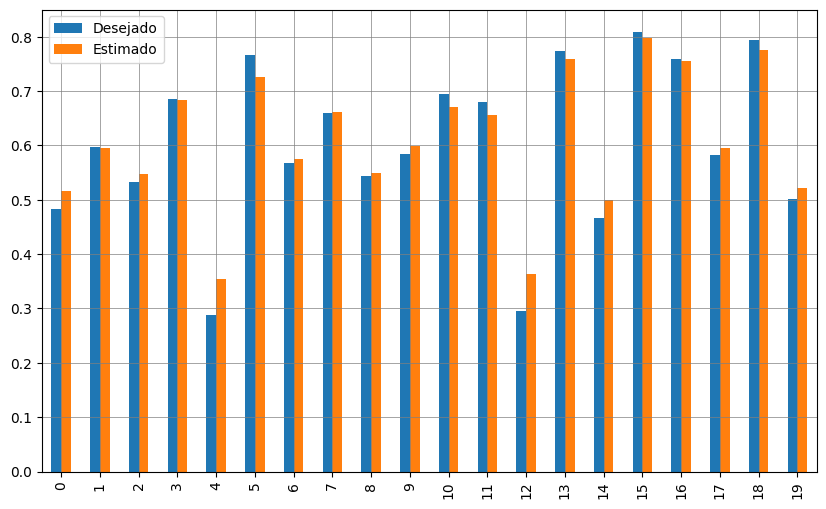

In [ ]:
mlp_logistic_15 = MLPRegressor(hidden_layer_sizes=(15), activation='logistic', max_iter=1000,
                      learning_rate_init=0.01)

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_logistic_15.fit(trainX, trainY)
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_logistic_15.predict(testX)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(40) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

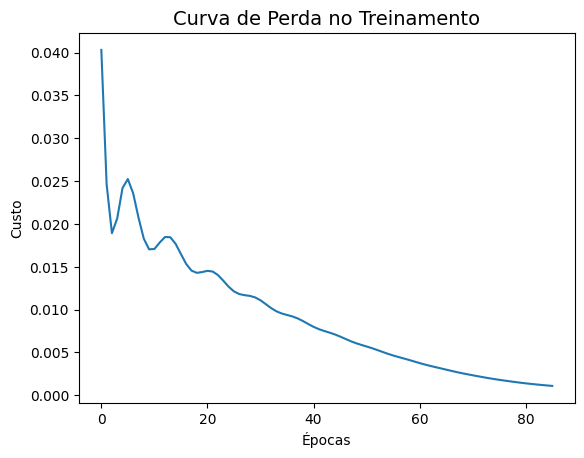

In [ ]:
plt.plot(mlp_logistic_15.loss_curve_) # Plotando o gráfico de erros no processo de treinamento
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.
print('R2: ', metrics.r2_score(testY, y_pred)) # Apresenta o R2 Score - Representa quanto o modelo está prevendo corretamente, tem uma variação de 0 a 1. Caso seja obtido pelo modelo o R2 = 1, pode ser afirmado que os dados tem relação linear de 100%.
print(mlp_logistic_15.loss_)
print(mlp_logistic_15.n_iter_)

Mean Absolute Error (MAE): 0.020795094143182168
Mean Squared Error (MSE): 0.0007846369701053199
Root Mean Squared Error (RMSE): 0.028011372156774468
Mean Absolute Percentage Error (MAPE): 0.04635256465160951
R2:  0.9636447201163014
0.0010972197793596844
86
